# Reconhecimento de voz com SpeechRecognition

Aplicando reconhecimento de voz em uma música do CBJr. A música selecionada foi [Vícios e Virtudes](https://www.letras.mus.br/charlie-brown-jr/751729/)

## Instalando e Importando as Bibliotecas

In [17]:
!pip install SpeechRecognition

In [18]:
#!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

In [19]:
#!pip install pyaudio

In [20]:
#!pip install ffmpeg-python

In [21]:
!pip install pydub

In [22]:
import speech_recognition as sr
from pydub import AudioSegment
from pydub.utils import make_chunks
import matplotlib.pyplot as plt
from wordcloud import WordCloud


## Convertendo Arquivos de Áudio

In [23]:
# arquivos                                                                         
audio_mp3 = 'Vicios_e_Virtudes.mp3'
audio_wav = 'Vicios_e_Virtudes.wav'

# conversão de mp3 para wav                                                           
sound = AudioSegment.from_mp3(audio_mp3)
sound.export(audio_wav, format='wav')

<_io.BufferedRandom name='Vicios_e_Virtudes.wav'>

## Dividindo os Arquivos de Áudio

In [24]:
# selecionando audio
audio = AudioSegment.from_file(audio_wav, 'wav')
# Tamanho em milisegundos
tamanho = 30000
# divisão do audio em partes
partes = make_chunks (audio, tamanho) 
partes_audio =[]
for i, parte in enumerate(partes):
    # Enumerando arquivo particionado
    parte_name = 'Vicios{0}.wav'.format(i)
    # Guardando os nomes das partições em uma lista
    partes_audio.append(parte_name)
    # Exportando arquivos
    parte.export(parte_name, format='wav')
partes_audio

['Vicios0.wav',
 'Vicios1.wav',
 'Vicios2.wav',
 'Vicios3.wav',
 'Vicios4.wav',
 'Vicios5.wav']

## Função para Reconhecimento de Voz

In [25]:
def transcreve_audio(nome_audio):
  # Selecione o audio para reconhecimento
  r = sr.Recognizer()
  with sr.AudioFile(nome_audio) as source:
    audio = r.record(source)  # leitura do arquivo de audio

  # Reconhecimento usando o Google Speech Recognition
  try:
    print('Google Speech Recognition: ' + r.recognize_google(audio,language='pt-BR'))
    texto = r.recognize_google(audio,language='pt-BR')
  except sr.UnknownValueError:
    print('Google Speech Recognition NÃO ENTENDEU o audio')
    texto = ''
  except sr.RequestError as e:
    print('Não foi possível solicitar resultados do serviço Google Speech Recognition; {0}'.format(e))
    texto = ''
  return texto

## Transformação do Áudio em Texto

In [26]:
# Aplicando a função de reconhecimento de voz em cada parte
texto = ''
for parte in partes_audio:
  texto = texto + ' ' + transcreve_audio(parte)

Google Speech Recognition: vídeo de sexo de ninguém ajuda de ninguém às vezes faço o que quero e às vezes faço o que tenho que fazer as vezes que vieram e às vezes faço o que tenho que fazer eu nunca tive muito a ver com ela o livro que ela ama eu não li eu nunca tive muito
Google Speech Recognition: é a um filme que ela adora eu não vi Como chegar nela eu nem sei ela é tão interessante e eu aqui pichando muro Como chegar ao na espera tão diferente ou igual a todo mundo logo eu que sempre achei legal ser tão errado eu que nem sempre calmo mas nunca preocupado
Google Speech Recognition: Fique calmo mas nunca preocupado de ninguém ninguém sabe o que quero e às vezes faço o que tenho que fazer
Google Speech Recognition: e às vezes faço o que tenho que fazer hoje eu volto pra fazer só a sua vontade mais Se eu não puder fazer você a pessoa mais feliz eu chego mais perto disso possível todos os incovenientes a nosso favor e diferenças se mais nunca mais
Google Speech Recognition: sempre calm

In [27]:
texto

' vídeo de sexo de ninguém ajuda de ninguém às vezes faço o que quero e às vezes faço o que tenho que fazer as vezes que vieram e às vezes faço o que tenho que fazer eu nunca tive muito a ver com ela o livro que ela ama eu não li eu nunca tive muito é a um filme que ela adora eu não vi Como chegar nela eu nem sei ela é tão interessante e eu aqui pichando muro Como chegar ao na espera tão diferente ou igual a todo mundo logo eu que sempre achei legal ser tão errado eu que nem sempre calmo mas nunca preocupado Fique calmo mas nunca preocupado de ninguém ninguém sabe o que quero e às vezes faço o que tenho que fazer e às vezes faço o que tenho que fazer hoje eu volto pra fazer só a sua vontade mais Se eu não puder fazer você a pessoa mais feliz eu chego mais perto disso possível todos os incovenientes a nosso favor e diferenças se mais nunca mais sempre calmo mas nunca preocupado logo eu que sempre achei legal ser tão errado eu que nem sempre calmo mas nunca preocupado a nossa vontade mai

## WordCloud do Texto

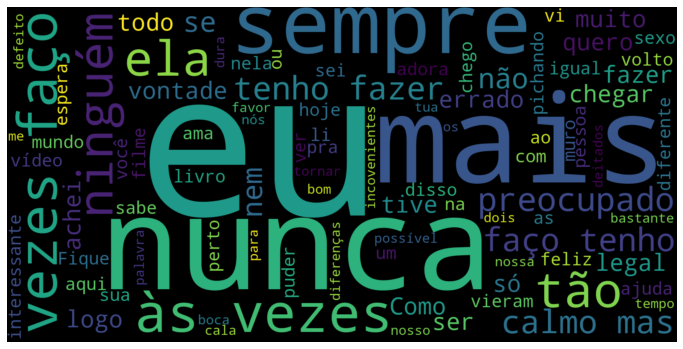

In [28]:
# criar uma lista de stop_words
stop_words = ['a','e','o','de','da','do','que']

# criar uma wordcloud
wc = WordCloud(stopwords=stop_words, background_color="black", width=1600, height=800)
wordcloud = wc.generate(texto)

# plotar wordcloud
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()